In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf

In [3]:
df = pd.read_excel('./data/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns = ['cement', 'furnace', 'ash', 'water', 'superplasticzer', 'coarse', 'fine', 'age', 'strength']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cement           1030 non-null   float64
 1   furnace          1030 non-null   float64
 2   ash              1030 non-null   float64
 3   water            1030 non-null   float64
 4   superplasticzer  1030 non-null   float64
 5   coarse           1030 non-null   float64
 6   fine             1030 non-null   float64
 7   age              1030 non-null   int64  
 8   strength         1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.head()

,cement,furnace,ash,water,superplasticzer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
# 

In [8]:
y = df.iloc[:, 8]
x = df.iloc[:, :8]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [10]:
x_train.shape

(824, 8)

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs=100, batch_size=20)

Epoch 1/100
33/33 [==============================] - 1s 5ms/step - loss: 1404.8088 - val_loss: 1080.3625
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 688.9412 - val_loss: 250.2049
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 233.5467 - val_loss: 208.0155
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 195.7582 - val_loss: 189.0058
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 178.0768 - val_loss: 181.1136
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 164.5031 - val_loss: 167.2596
Epoch 7/100
33/33 [==============================] - 0s 1ms/step - loss: 155.5547 - val_loss: 164.3192
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 148.1814 - val_loss: 159.4996
Epoch 9/100
33/33 [==============================] - 0s 1ms/step - loss: 140.5321 - val_loss: 151.2547
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - los

33/33 [==============================] - 0s 1ms/step - loss: 15.7135 - val_loss: 27.1594
Epoch 82/100
33/33 [==============================] - 0s 1ms/step - loss: 14.8480 - val_loss: 31.6698
Epoch 83/100
33/33 [==============================] - 0s 1ms/step - loss: 15.6327 - val_loss: 29.1710
Epoch 84/100
33/33 [==============================] - 0s 1ms/step - loss: 14.5224 - val_loss: 27.4276
Epoch 85/100
33/33 [==============================] - 0s 1ms/step - loss: 14.7423 - val_loss: 29.4952
Epoch 86/100
33/33 [==============================] - 0s 1ms/step - loss: 14.4815 - val_loss: 30.4732
Epoch 87/100
33/33 [==============================] - 0s 1ms/step - loss: 14.5267 - val_loss: 25.0558
Epoch 88/100
33/33 [==============================] - 0s 1ms/step - loss: 14.4792 - val_loss: 24.5683
Epoch 89/100
33/33 [==============================] - 0s 1ms/step - loss: 13.8848 - val_loss: 27.5102
Epoch 90/100
33/33 [==============================] - 0s 1ms/step - loss: 14.3810 - val_loss: 2

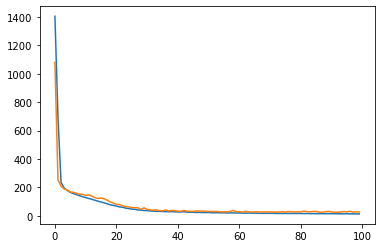

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [15]:
preds = model.predict(x_test_sc)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8911506583519925

In [52]:
list(y_test)

[47.739318239999996,
 30.44726016,
 42.29245784,
 32.922478999999996,
 65.909079268,
 26.22766704,
 20.96696516,
 10.53519328,
 23.221551679999997,
 13.395533715270679,
 33.05347944,
 42.79577532,
 36.44570136,
 52.82075636,
 37.34202016,
 62.935369279999996,
 33.72916592,
 29.7508894,
 24.40055564,
 24.44881896,
 20.08443588,
 32.039949719999996,
 18.287661424,
 34.23937816,
 49.20100736,
 50.60064364,
 21.917063088,
 15.091250688,
 64.30053176,
 41.934619796,
 68.29949256,
 39.056057496,
 44.38846488,
 33.398217439999996,
 30.2335226,
 34.73580088,
 33.5430074,
 39.45181672,
 48.846616696,
 32.763899519999995,
 79.29663476,
 43.01296026,
 24.579819399999998,
 44.86420332,
 33.019005639999996,
 23.835874796,
 43.377003588,
 21.29101888,
 32.72253096,
 22.435549039999998,
 40.563252031999994,
 44.51946532,
 34.48758952,
 32.401235144,
 55.89581932,
 45.2985732,
 33.116911232,
 33.082437432,
 37.363393916,
 31.44700036,
 33.192064116000005,
 12.83804312,
 57.21823428799999,
 36.34986419

206

In [58]:
for i in range(10):
    predict_str = preds[i][0]
    real_str = list(y_test)[i]

    print("{} - {} = {}".format(round(real_str), round(predict_str), round(real_str) - round(predict_str)))

48 - 45 = 3
30 - 34 = -4
42 - 28 = 14
33 - 33 = 0
66 - 58 = 8
26 - 32 = -6
21 - 16 = 5
11 - 13 = -2
23 - 22 = 1
13 - 19 = -6
